# Searching for Correlations in High School Graduations

In [113]:
# dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
%matplotlib inline

In [114]:
# plotly credentials

plotly.tools.set_credentials_file(username="abi.mvasquez", api_key="pX9WEUeT7jYv9HAtbhHX")

### School Funding (Revenue) by State ###

In [115]:
# uploading csv and creating dataframe
rev_data = os.path.join('Resources','Stfis14_1a.csv')
rev_data_df = pd.read_csv(rev_data)
rev_data_df.head()

,SURVYEAR,FIPS,STABR,STNAME,R1A,R1B,R1C,R1D,R1E,R1F,...,A14B,PPE15,MEMBR13,ARRASTE1,ARRATE5,ARRAE81Z,ARRATE10,ARRASTE6,ARRATLEIZ,ARRASTE4
0,2014,1,AL,Alabama,-2,-2,1128860063,621382410,6131559,1033208,...,706566,8767,746204,805460,1404270,17206,0,15000,107591,0
1,2014,2,AK,Alaska,-2,-2,295232764,161453827,142222,159692,...,-2,19699,130944,20946,46923,0,0,0,0,0
2,2014,4,AZ,Arizona,2979308590,-2,-2,66772046,5748335,18493579,...,-2,7783,1102445,0,0,0,0,0,0,0
3,2014,5,AR,Arkansas,1619649401,1223591,-2,11117198,10086128,2445184,...,-2,9946,489979,1175969,4031513,0,72883,0,0,0
4,2014,6,CA,California,18407152429,933627693,168400,-2,1117595,371734184,...,-2,9740,6312623,22075494,37624403,402380,166270,0,29240684,0


In [116]:
# filtering out the wanted data
rev_data_df = rev_data_df[["SURVYEAR", "STABR", "STNAME", "STR1", "R3", "STR4", "TR", "E11", "E11A"]]
rev_data_df.head()

,SURVYEAR,STABR,STNAME,STR1,R3,STR4,TR,E11,E11A
0,2014,AL,Alabama,2479526880,4065545836,838649689,7396933084,2495972800,1775677776
1,2014,AK,Alaska,529595705,1835601093,312161832,2677358630,688001845,-1
2,2014,AZ,Arizona,3899570304,4217359201,1203567314,9594427770,3039539648,2013800192
3,2014,AR,Arkansas,1872187527,2665329194,592246357,5133841370,1818164198,1170635549
4,2014,CA,California,23107204742,39293076276,6942639777,69342920795,23880538763,17076582010


In [117]:
# using csv file key to rename columns
renamed_df = rev_data_df.rename(columns={"SURVYEAR":"YEAR", "STABR":"ST", "STNAME":"STATE", 
                                         "STR1":"LOCAL REVENUES SUBTOTAL", 
                                        "R3":"STATE REVENUES", "STR4":"FEDERAL REVENUES SUBTOTAL", 
                                        "TR":"TOTAL REVENUES FROM ALL SOURCES", 
                                         "E11":"INSTRUCTIONAL EXPENDITURES SALARIES", 
                                        "E11A":"TEACHER SALARIES REGULAR PROGRAMS"})
renamed_df.head()

,YEAR,ST,STATE,LOCAL REVENUES SUBTOTAL,STATE REVENUES,FEDERAL REVENUES SUBTOTAL,TOTAL REVENUES FROM ALL SOURCES,INSTRUCTIONAL EXPENDITURES SALARIES,TEACHER SALARIES REGULAR PROGRAMS
0,2014,AL,Alabama,2479526880,4065545836,838649689,7396933084,2495972800,1775677776
1,2014,AK,Alaska,529595705,1835601093,312161832,2677358630,688001845,-1
2,2014,AZ,Arizona,3899570304,4217359201,1203567314,9594427770,3039539648,2013800192
3,2014,AR,Arkansas,1872187527,2665329194,592246357,5133841370,1818164198,1170635549
4,2014,CA,California,23107204742,39293076276,6942639777,69342920795,23880538763,17076582010


In [118]:
# school funding (revenue) by state data in map
trc = dict(type='choropleth', locations=renamed_df["ST"], locationmode='USA-states', colorscale='Greens',
          z=renamed_df["TOTAL REVENUES FROM ALL SOURCES"], colorbar = dict(
            title = "Billions of Dollars"))

layout=dict(geo=dict(scope='usa'),  title = 'School Funding (Revenue) by State')
map=go.Figure(data=[trc], layout=layout)

plt.savefig('SchoolFunding.png')
py.iplot(map)

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

### Teen Pregnancy Rate by State ###

In [119]:
# import super janky csv and create dataframe
#https://www.cdc.gov/nchs/pressroom/sosmap/teen-births/teenbirths.htm
# birth rate is (number of births) x 1000 / estimated population at mid-year
preg_data = os.path.join('Resources','TEENBIRTHS2016.csv')
preg_data_df = pd.read_csv(preg_data)
preg_data_df = preg_data_df.rename(columns={"STATE":"ST"})
preg_data_df.head()

,ST,RATE,URL
0,AL,28.4,/nchs/pressroom/states/alabama/alabama.htm
1,AK,25.8,/nchs/pressroom/states/alaska/alaska.htm
2,AZ,23.6,/nchs/pressroom/states/arizona/arizona.htm
3,AR,34.6,/nchs/pressroom/states/arkansas/arkansas.htm
4,CA,17.0,/nchs/pressroom/states/california/california.htm


In [121]:
# teen pregnancy rate by state data map
trc = dict(type='choropleth', locations=preg_data_df["ST"], locationmode='USA-states', colorscale='Reds',
          z=preg_data_df["RATE"], colorbar = dict(
            title = "Percent (%)"))

layout=dict(geo=dict(scope='usa'),  title = 'Teen Pregnancy Rates per State')
map=go.Figure(data=[trc], layout=layout)

plt.savefig('PregnancyRate.png')
py.iplot(map)

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

### Spending per Student by State ###

In [122]:
# import csv and create dataframe
#https://www.census.gov/data/tables/2014/econ/school-finances/secondary-education-finance.html
stu_spend = os.path.join('Resources','studentspending.csv')
stu_spend_df = pd.read_csv(stu_spend)
stu_spend_df = stu_spend_df.rename(columns={"State":"ST"})
stu_spend_df.head()

,ST,Spending per Student
0,DC,29865.60
1,NY,23326.89
2,CT,20576.57
3,NJ,20525.21
4,AK,20403.77


In [123]:
# spending per student by state data map
trc = dict(type='choropleth', locations=stuspend_df["ST"], locationmode='USA-states', colorscale='Greens',
          z=stuspend_df["Spending per Student"], colorbar = dict(title = "Thousands of Dollars"))
lyt=dict(geo=dict(scope='usa'), title = 'Spending per Student by State')
map=go.Figure(data=[trc], layout=lyt)

plt.savefig('SpendingPerStudent.png')
py.iplot(map)

NameError: name 'stuspend_df' is not defined

### Average SAT Scores by State ###

In [124]:
# import csv and create dataframe
sat_scores = os.path.join('Resources', 'SATscores.csv')
sat_df = pd.read_csv(sat_scores)
sat_df.head()

,State,State1,Average New SAT Score,Participation Rate
0,AL,Alabama,998,7%
1,AK,Alaska,1037,54%
2,AZ,Arizona,1045,36%
3,AR,Arkansas,1034,4%
4,CA,California,1053,60%


In [125]:
satdf = sat_df.rename(columns={"State":"ST"})
satdf.head()

,ST,State1,Average New SAT Score,Participation Rate
0,AL,Alabama,998,7%
1,AK,Alaska,1037,54%
2,AZ,Arizona,1045,36%
3,AR,Arkansas,1034,4%
4,CA,California,1053,60%


In [126]:
# average SAT scores by state data map
satdf = dict(type='choropleth', locations=satdf['ST'], locationmode='USA-states', colorscale='Blues',
        z=satdf['Average New SAT Score'], colorbar = dict(
          title = "Average SAT Score"))

layout=dict(geo=dict(scope='usa'),  title = 'Average SAT Score per State')
map=go.Figure(data=[satdf], layout=layout)

plt.savefig('SATScores.png')
py.iplot(map)

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

### Average Graduation Rates by State ###

In [127]:
# import csv and create dataframe
grad_rates = os.path.join('Resources','gradrates.csv')
grad_df = pd.read_csv(grad_rates)
grad_df = grad_df.rename(columns={"State":"ST"})
grad_df.head()

,ST,State1,Average Rate,American Indian/Alaska Native,Asian/Pacific Islander,Hispanic,Black,White
0,AL,Alabama,0.871,0.900,0.910,0.870,0.845,0.886
1,AK,Alaska,0.761,0.640,0.810,0.760,0.740,0.808
2,AZ,Arizona,0.795,0.677,0.890,0.764,0.755,0.840
3,AR,Arkansas,0.870,0.870,0.870,0.857,0.815,0.892
4,CA,California,0.830,0.740,0.929,0.800,0.730,0.880


In [128]:
sorted_grad = grad_df.sort_values(by=["Average Rate"], ascending=False)
sorted_grad.head()

,ST,State1,Average Rate,American Indian/Alaska Native,Asian/Pacific Islander,Hispanic,Black,White
15,KS,Iowa,0.913,0.81,0.910,0.850,0.800,0.929
30,NM,New Jersey,0.901,0.83,0.967,0.833,0.821,0.942
48,WI,West Virginia,0.898,0.00,NaN,0.890,0.880,0.899
27,NV,Nebraska,0.893,0.74,0.810,0.818,0.790,0.926
43,UT,Texas,0.891,0.87,0.954,0.869,0.854,0.934


### Average Teacher Salary by State ###

In [129]:
teacher_salary = os.path.join('Resources', 'teachersalary.csv')
teacher_df = pd.read_csv(teacher_salary)
teacher_df = teacher_df.rename(columns={"State":"ST"})
teacher_df.head()

,ST,STATE1,AVERAGE STARTING SALARY,AVERAGE SALARY
0,AL,Alabama,36198,47949
1,AK,Alaska,44166,65468
2,AZ,Arkansas,32691,46632
3,AR,Arizona,31874,49885
4,CA,California,41259,69324


### High School Grad Rates ###

In [130]:
# importing csv and creating dataframe ***need csv

csv = os.path.join('Resources', 'Hsgradrates2.csv')
hsgraddf = pd.read_csv(csv)
hsgraddf.head()

,Unnamed: 0,States,2014-15,White,Black,Hispanic,Asian Pacific Islander,Asian Pacific Islander,Students with disabil-ities,Limited English Proficient,Economically disadvan-taged
0,0,United States,83,88,75,78,90.0,72.0,65,65,76
1,1,Alabama,89,91,87,90,93.0,90.0,72,75,85
2,2,Alaska,76,80,71,72,83.0,64.0,57,56,67
3,3,Arizona,77,83,73,73,87.0,67.0,64,34,73
4,4,Arkansas,85,87,78,85,86.0,80.0,82,86,82


In [131]:
hsgraddf["ST"] = ['US','AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA',
                  'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM',
                  'NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA',
                  'WV','WI','WY']
hsgraddf = hsgraddf[["ST","States", "2014-15","White", "Black", "Hispanic", "Asian Pacific Islander", 
                     "Asian Pacific Islander", "Students with disabil-ities", "Limited English Proficient",
                    "Economically disadvan-taged"]]
hsgraddf.head()

,ST,States,2014-15,White,Black,Hispanic,Asian Pacific Islander,Asian Pacific Islander,Students with disabil-ities,Limited English Proficient,Economically disadvan-taged
0,US,United States,83,88,75,78,72.0,72.0,65,65,76
1,AL,Alabama,89,91,87,90,90.0,90.0,72,75,85
2,AK,Alaska,76,80,71,72,64.0,64.0,57,56,67
3,AZ,Arizona,77,83,73,73,67.0,67.0,64,34,73
4,AR,Arkansas,85,87,78,85,80.0,80.0,82,86,82


In [132]:
trc = dict(type='choropleth', locations=['US','AL','AK','AZ','AR','CA','CO','CT','DE','DOC','FL','GA','HI','ID','IL','IN','IA',
                                         'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM',
                                         'NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA',
                                         'WV','WI','WY']
, locationmode='USA-states', colorscale='YlOrRd',
           z=hsgraddf['2014-15'], colorbar = dict(
            title = 'Percent (%)'))
lyt=dict(geo=dict(scope='usa'))
map=go.Figure(data=[trc], layout=lyt)

py.iplot(map)

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

### Graduation by Income ###

**Adjusted Cohort Graduation Rate(ACGR)**

**"http://gradnation.americaspromise.org/sites/default/files/d8/2017-05/Appendix_G.pdf", As part of an audit conducted by education officials from Alabama in December 2016, it was announced that the graduation rates of the state were inaccurate because the reports had been calculated improperly, hence the rates of this report may have some inflation, since the graduation rates of Alabama is still included here.**

**2015(%) = number of low-income students, which was divided by the total cohort size for each state. Estimated non low-income ACGR 2015 (%) = the estimated graduates from all students minus low-income graduates 2015 (%) = the number of low-income students divided by the total cohort size within each state. Estimated Non-Low-Income ACGR (%) = the estimated graduates from all students minus low-income graduates divided by the estimated total cohort of all students minus low-income within the cohort (i.e., using state level ACGRs). Gap Change Between Non-Low-Income and Low-Income ACGR (Percentage Points), 2011-15 = the gap between the estimated non-low-income and low-income ACGRs from 2010-11 to 2013-15. Therefore, positive values indicate gap closure and negative values indicate gap widening. Sources: U.S. Department of Education through provisional data file of SY2010-11 and SY 2014-15 State Level Four-Year Regulatory Adjusted Cohort Graduation Rates and Cohort Counts. Retrieved on November 6, 2016 from http://eddataexpress.ed.gov/state-tables-main.cfm".**

In [133]:
#Data Source
# http://gradnation.americaspromise.org/sites/default/files/d8/2017-05/Appendix_G.pdf
# used adobe acrobat pro to convert the PDF to excel format and then saved excel as csv
csv_glor = os.path.join('Resources', 'Main_data_AppendixG.csv')
gh = pd.read_csv(csv_glor)
gh.head()

,Abb,State,"Gap between Non-Low Income and Low-Income ACGR (Percentage Points), 2011",Overall 2015 ACGR(%),"Percent of Low-Income Students in the Cohort, 2015 (%)",Estimated Non-Low-Income 2015 ACGR(%),Low-Income 2015 ACGR(%),"Gap between Non-Low Income and Low-Income ACGR (Percentage Points, 2015","Gap Change between Non-Low-Income and Low-Income ACGR (Percentage points), 2011-15"
0,AL,Alabama*,19.73,89.3%,49.5%,93.8%,84.7%,9.1,10.6
1,AK,Alaska,18.28,75.6%,35.8%,80.6%,66.6%,14.0,4.2
2,AZ,Arizona,7.94,77.4%,39.7%,80.2%,73.1%,7.1,0.8
3,AR,Arkansas,12.14,84.9%,49.6%,88.1%,81.7%,6.4,5.8
4,CA,California,15.49,82.0%,67.2%,90.2%,78.0%,12.2,3.3


In [134]:
# printed this to show that the last row has no data
gh.tail()

,Abb,State,"Gap between Non-Low Income and Low-Income ACGR (Percentage Points), 2011",Overall 2015 ACGR(%),"Percent of Low-Income Students in the Cohort, 2015 (%)",Estimated Non-Low-Income 2015 ACGR(%),Low-Income 2015 ACGR(%),"Gap between Non-Low Income and Low-Income ACGR (Percentage Points, 2015","Gap Change between Non-Low-Income and Low-Income ACGR (Percentage points), 2011-15"
46,WA,Washington,17.38,78.2%,51.2%,88.8%,68.1%,20.7,-3.3
47,WV,West Virginia,19.86,86.5%,66.4%,93.6%,82.9%,10.7,9.2
48,WI,Wisconsin,18.00,88.4%,32.2%,93.7%,77.3%,16.4,1.6
49,WY,Wyoming,21.66,79.3%,39.6%,88.0%,66.0%,22.0,-0.4
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# printed this to see accuracute columns spelling and hidden characters
gh.columns

Index(['Abb', 'State',
       'Gap between Non-Low Income \nand Low-Income ACGR (Percentage Points), 2011',
       'Overall 2015 \nACGR(%)',
       'Percent of Low-Income \nStudents in the \nCohort, 2015 (%)',
       'Estimated \nNon-Low-Income 2015 ACGR(%)', 'Low-Income 2015\nACGR(%)',
       'Gap between Non-Low Income \nand Low-Income ACGR\n(Percentage Points, 2015',
       'Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15'],
      dtype='object')

In [136]:
#Cleanup

#removed percentage signs, removed † and replace with NaN, format cells as float
gh['Low-Income 2015\nACGR(%)'] = gh['Low-Income 2015\nACGR(%)'].str.replace('%','').astype(float)
gh['Estimated \nNon-Low-Income 2015 ACGR(%)'] = gh['Estimated \nNon-Low-Income 2015 ACGR(%)'].str.replace('%','').astype(float)
gh['Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15'] = gh['Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15'].str.replace('†','NaN').astype(float)
gh['Overall 2015 \nACGR(%)'] = gh['Overall 2015 \nACGR(%)'].str.replace('%','').astype(float)

# drop the last column showing NaN since its not a state
gh = gh.drop(gh.index[len(gh)-1])
gh.tail()

,Abb,State,"Gap between Non-Low Income and Low-Income ACGR (Percentage Points), 2011",Overall 2015 ACGR(%),"Percent of Low-Income Students in the Cohort, 2015 (%)",Estimated Non-Low-Income 2015 ACGR(%),Low-Income 2015 ACGR(%),"Gap between Non-Low Income and Low-Income ACGR (Percentage Points, 2015","Gap Change between Non-Low-Income and Low-Income ACGR (Percentage points), 2011-15"
45,VA,Virginia,17.06,85.7,31.8%,90.5,75.4,15.1,1.9
46,WA,Washington,17.38,78.2,51.2%,88.8,68.1,20.7,-3.3
47,WV,West Virginia,19.86,86.5,66.4%,93.6,82.9,10.7,9.2
48,WI,Wisconsin,18.00,88.4,32.2%,93.7,77.3,16.4,1.6
49,WY,Wyoming,21.66,79.3,39.6%,88.0,66.0,22.0,-0.4


** Which 5 states are low household income high schoolers most likely to graduate? ** 
**Ans: Most likely; Texas, Kentucky, Iowa, Alabama, Indiana**

**Which 5 states are low household income high schoolers less likely to graduate
Less likely; Oregon, Wyoming, Colorado, Nevada, New Mexico***

In [137]:
gh[ ['State','Low-Income 2015\nACGR(%)'] ].sort_values(by='Low-Income 2015\nACGR(%)', ascending=False).head()

,State,Low-Income 2015 ACGR(%)
42,Texas,85.6
16,Kentucky,84.8
14,Iowa,84.8
0,Alabama*,84.7
13,Indiana,84.2


In [138]:
gh[ ['State','Low-Income 2015\nACGR(%)'] ].sort_values(by='Low-Income 2015\nACGR(%)', ascending=False).tail()

,State,Low-Income 2015 ACGR(%)
36,Oregon,66.4
49,Wyoming,66.0
5,Colorado,65.5
27,Nevada,63.7
30,New Mexico,63.5


**What impact does income have on high school graduation rates?**

**Ans: The higher the household income, the greater the likelihood of graduation from high school**

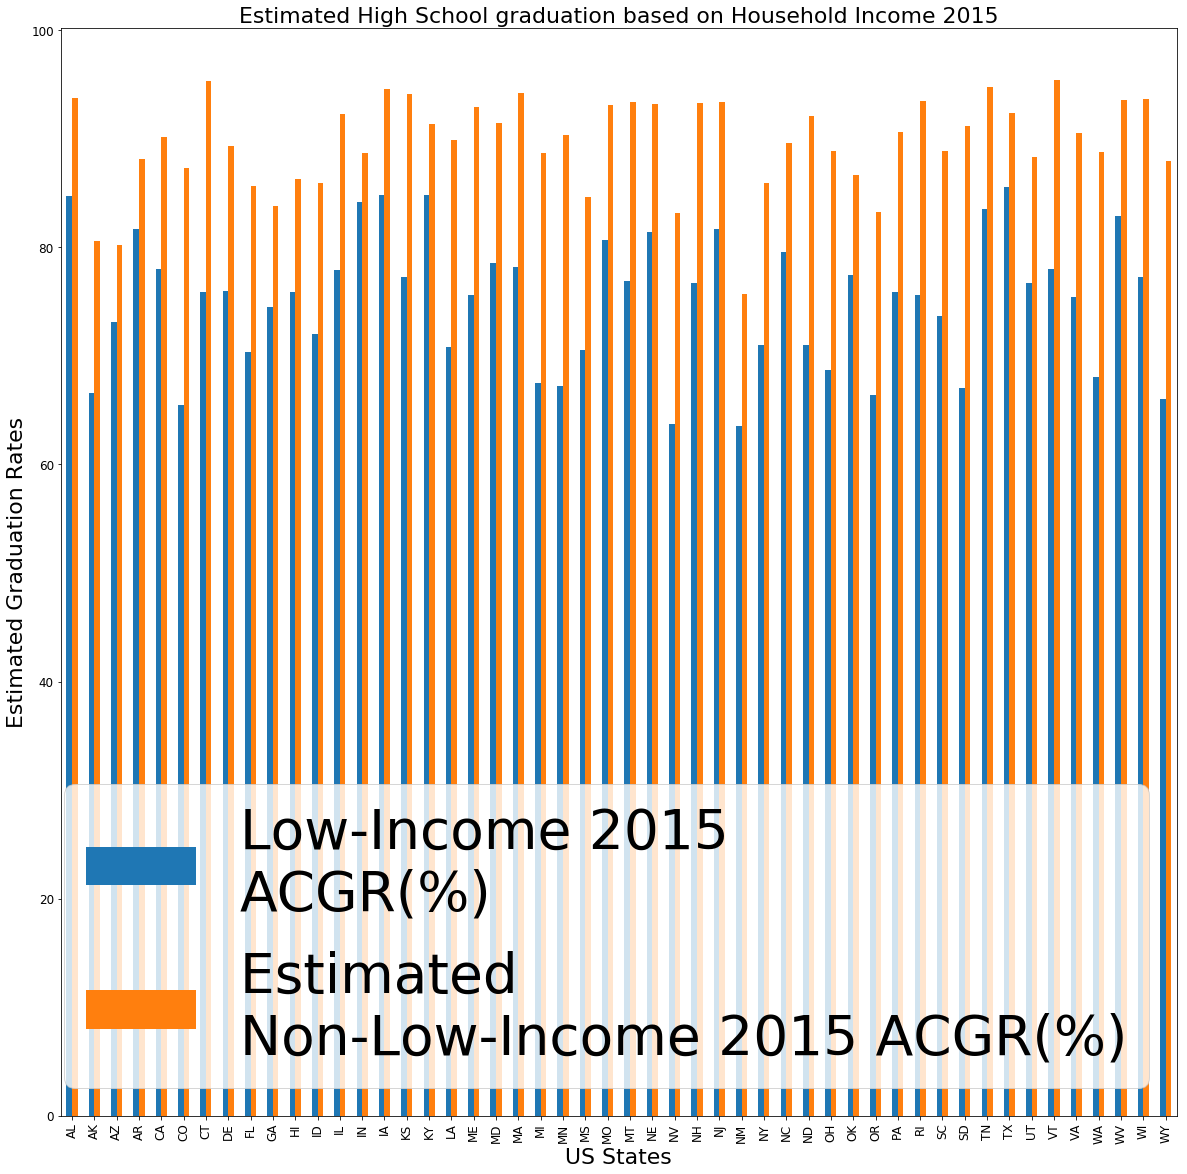

In [139]:
#gh.plot(x='Percent of Low-Income \nStudents in the \nCohort, 2015 (%)', y='Estimated \nNon-Low-Income 2015 ACGR(%)')
gh.plot(x="Abb",
        y=["Low-Income 2015\nACGR(%)",
          "Estimated \nNon-Low-Income 2015 ACGR(%)"], kind="bar", figsize=(20,20), fontsize=12, legend = True)

plt.title("Estimated High School graduation based on Household Income 2015", size = 22)
plt.xlabel("US States", size = 22)
plt.ylabel("Estimated Graduation Rates", size = 22)
plt.legend(loc=4, prop={'size': 55})

**What States have closed the gap between low-income and non-low-income graduation rates?**

**Ans: Alabama, West Virginia, Connecticut, Indiana, Georgia**

In [140]:
gh[ ['State', 'Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15'] ].sort_values(by='Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15', ascending=False).head()

,State,"Gap Change between Non-Low-Income and Low-Income ACGR (Percentage points), 2011-15"
0,Alabama*,10.6
47,West Virginia,9.2
6,Connecticut,7.9
13,Indiana,6.0
9,Georgia,5.8


**positive values indicate gap closure and negative values indicate gap widening.**

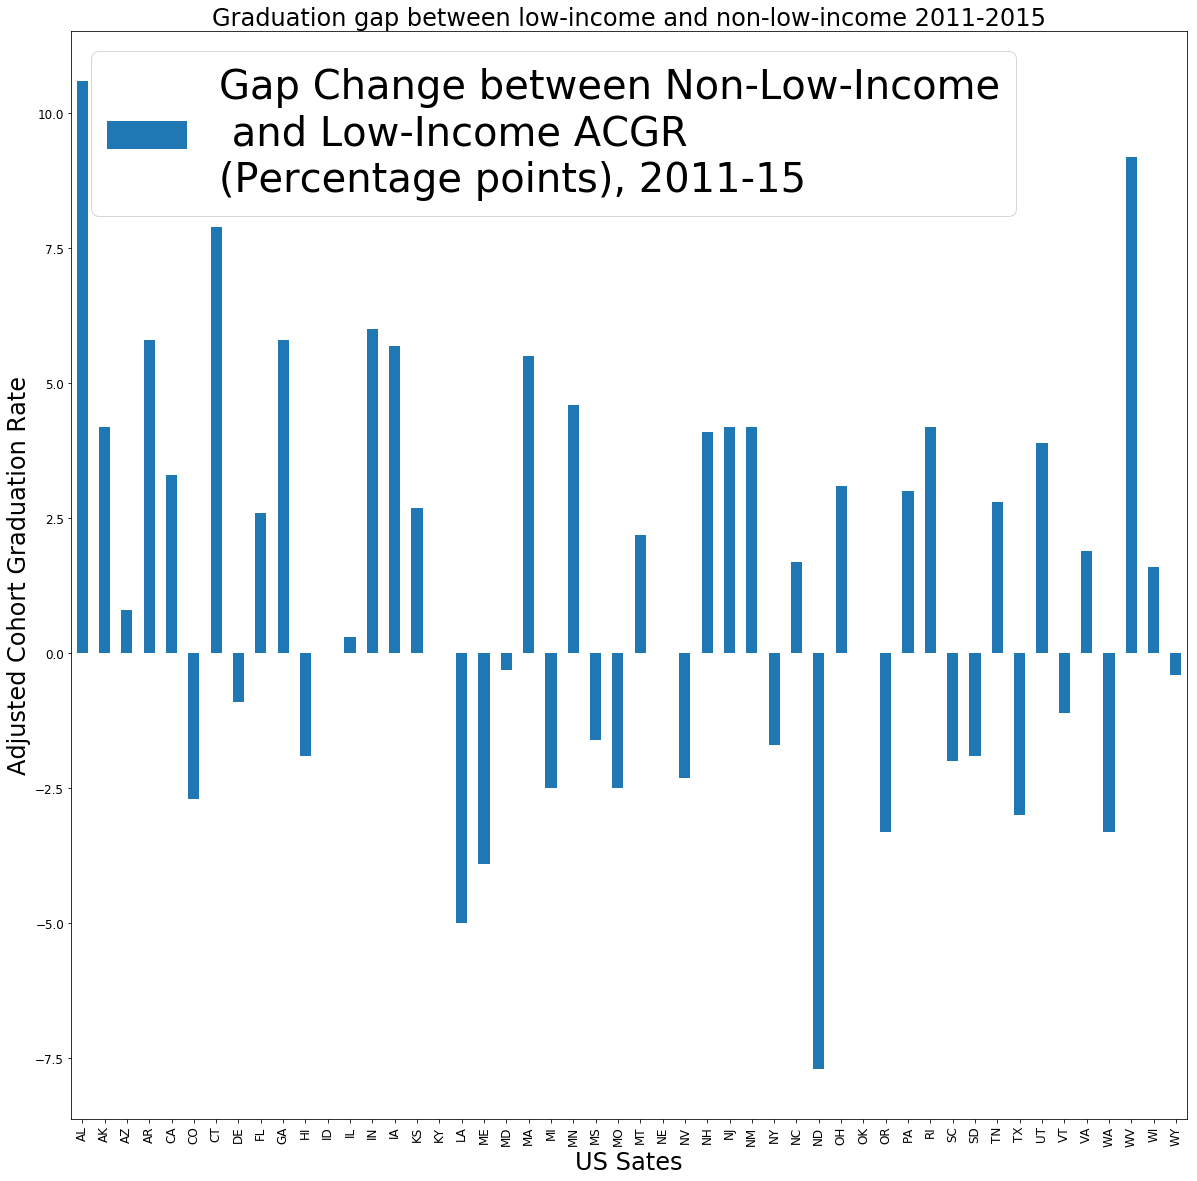

In [141]:
gh.plot(x="Abb", y='Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15', kind="bar", figsize=(20,20), fontsize=12)

plt.title('Graduation gap between low-income and non-low-income 2011-2015', size = 24)
plt.xlabel('US Sates', size=24)
plt.ylabel('Adjusted Cohort Graduation Rate',size=24)
plt.legend(loc=0, prop={'size': 40})


### Merging Dataframes ###

In [142]:
# merging school funding and pregnancy rate
merge_table = pd.merge(renamed_df, preg_data_df, on="ST", how="outer")
merge_table.head()

,YEAR,ST,STATE,LOCAL REVENUES SUBTOTAL,STATE REVENUES,FEDERAL REVENUES SUBTOTAL,TOTAL REVENUES FROM ALL SOURCES,INSTRUCTIONAL EXPENDITURES SALARIES,TEACHER SALARIES REGULAR PROGRAMS,RATE,URL
0,2014,AL,Alabama,2479526880,4065545836,838649689,7396933084,2495972800,1775677776,28.4,/nchs/pressroom/states/alabama/alabama.htm
1,2014,AK,Alaska,529595705,1835601093,312161832,2677358630,688001845,-1,25.8,/nchs/pressroom/states/alaska/alaska.htm
2,2014,AZ,Arizona,3899570304,4217359201,1203567314,9594427770,3039539648,2013800192,23.6,/nchs/pressroom/states/arizona/arizona.htm
3,2014,AR,Arkansas,1872187527,2665329194,592246357,5133841370,1818164198,1170635549,34.6,/nchs/pressroom/states/arkansas/arkansas.htm
4,2014,CA,California,23107204742,39293076276,6942639777,69342920795,23880538763,17076582010,17.0,/nchs/pressroom/states/california/california.htm


In [143]:
merge_table = merge_table[["ST","STATE REVENUES", 
                           "TOTAL REVENUES FROM ALL SOURCES","RATE"]]

In [144]:
final_merge = merge_table.rename(columns={"RATE":"PREGNANCY RATE"})
final_merge.head()

,ST,STATE REVENUES,TOTAL REVENUES FROM ALL SOURCES,PREGNANCY RATE
0,AL,4065545836,7396933084,28.4
1,AK,1835601093,2677358630,25.8
2,AZ,4217359201,9594427770,23.6
3,AR,2665329194,5133841370,34.6
4,CA,39293076276,69342920795,17.0


In [145]:
# merging spending per student and average SAT
merge2 = pd.merge(satdf, stuspend_df, on="ST", how="outer")
merge2.head()


NameError: name 'stuspend_df' is not defined

In [146]:
merge2 = merge2[["ST","Average New SAT Score", "Spending per Student"]]
merge2.head()

NameError: name 'merge2' is not defined

In [147]:
# merging school funding, pregnancy rate, spending per student, and average SAT
merge3 = pd.merge(merge2, final_merge, on="ST", how="outer")

NameError: name 'merge2' is not defined

In [148]:
# merging average graduation rates and average teacher salary
merge4 = pd.merge(sorted_grad, teacher_df, on="ST", how="outer")
merge4 = merge4[["ST","Average Rate", "American Indian/Alaska Native", "Asian/Pacific Islander", "Hispanic", "Black",
                "White", "AVERAGE STARTING SALARY", "AVERAGE SALARY"]]

merge4.head()

,ST,Average Rate,American Indian/Alaska Native,Asian/Pacific Islander,Hispanic,Black,White,AVERAGE STARTING SALARY,AVERAGE SALARY
0,KS,0.913,0.81,0.910,0.850,0.800,0.929,34696,51456
1,NM,0.901,0.83,0.967,0.833,0.821,0.942,34280,55599
2,WI,0.898,0.00,NaN,0.890,0.880,0.899,33546,55171
3,NV,0.893,0.74,0.810,0.818,0.790,0.926,30778,45947
4,UT,0.891,0.87,0.954,0.869,0.854,0.934,38091,48110


In [156]:
merge4_fin = merge4.rename(columns={"Average Rate":"Average Graduation Rate", 
                                        "American Indian/Alaska Native":"Average Graduation Rate (American Indian/Alaska Native)",
                                       "Asian/Pacific Islander":"Average Graduation Rate (Asian/Pacific Islander)",
                                       "Hispanic":"Average Graduation Rate (Hispanic)",
                                       "Black":"Average Graduation Rate (Black)",
                                       "White":"Average Graduation Rate (White)",
                                       "AVERAGE STARTING SALARY":"Average Starting Teacher Salary",
                                   "AVERAGE SALARY":"Average Teacher Salary"})
merge4_fin.head()

,ST,Average Graduation Rate,Average Graduation Rate (American Indian/Alaska Native),Average Graduation Rate (Asian/Pacific Islander),Average Graduation Rate (Hispanic),Average Graduation Rate (Black),Average Graduation Rate (White),Average Starting Teacher Salary,Average Teacher Salary
0,KS,0.913,0.81,0.910,0.850,0.800,0.929,34696,51456
1,NM,0.901,0.83,0.967,0.833,0.821,0.942,34280,55599
2,WI,0.898,0.00,NaN,0.890,0.880,0.899,33546,55171
3,NV,0.893,0.74,0.810,0.818,0.790,0.926,30778,45947
4,UT,0.891,0.87,0.954,0.869,0.854,0.934,38091,48110


In [157]:
compiled1 = pd.merge(merge4_fin, merge3, on="ST", how="outer")

NameError: name 'merge3' is not defined

In [158]:
compiled1 = compiled1.rename(columns={"STATE REVENUES":"State Revenues ($)", 
                                        "TOTAL REVENUES FROM ALL SOURCES":"Total Revenues From All Sources ($)",
                                       "PREGNANCY RATE":"Pregnancy Rate (%)"})
compiled1.head()

NameError: name 'compiled1' is not defined

In [159]:
final_dataframe = compiled1.drop([38, 51, 52, 53, 54, 55, 56])
edu_fin = final_dataframe.reset_index()

NameError: name 'compiled1' is not defined

In [160]:
education_final = edu_fin.drop('index', axis=1)
education_final

NameError: name 'edu_fin' is not defined

### Scatter Plot of Graduation Rates Based on Race ###

In [161]:
trace1 = go.Scatter(
    x=['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN',
       'IA','KS','KY','LA','ME','MD','MA','MI','MN',
       'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
       'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'],
    y=grad_df['Average Rate'],
    name='Average Combined',
    yaxis='Average Combined',
    mode = 'markers'
)
trace2 = go.Scatter(
    x=['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN',
       'IA','KS','KY','LA','ME','MD','MA','MI','MN',
       'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
       'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'],
    y=grad_df['American Indian/Alaska Native'],
    name='American Indian/Alaska Native',
    yaxis='American Indian/Alaska Native',
    mode = 'markers'
)
trace3 = go.Scatter(
    x=['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN',
       'IA','KS','KY','LA','ME','MD','MA','MI','MN',
       'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
       'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'],
    y=grad_df['Asian/Pacific Islander'],
    name='Asian/Pacific Islander',
    yaxis='Asian/Pacific Islander',
    mode = 'markers'
)
trace4 = go.Scatter(
    x=['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN',
       'IA','KS','KY','LA','ME','MD','MA','MI','MN',
       'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
       'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'],
    y=grad_df['Hispanic'],
    name='Hispanic',
    yaxis='Hispanic',
    mode = 'markers'
)
trace5 = go.Scatter(
    x=['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN',
       'IA','KS','KY','LA','ME','MD','MA','MI','MN',
       'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
       'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'],
    y=grad_df['Black'],
    name='Black',
    yaxis='Black',
    mode = 'markers'
)
trace6 = go.Scatter(
    x=['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN',
       'IA','KS','KY','LA','ME','MD','MA','MI','MN',
       'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
       'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'],
    y=grad_df['White'],
    name='White',
    yaxis='White',
    mode = 'markers'
)
data = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(
    title='Average Graduation Rates Based on Race',
    width=800,
    xaxis=dict(
        domain=[0.1, 0.9]
    ),
    yaxis=dict(
        title='Average Combined Graduation Rate',
        titlefont=dict(
            color='#1f77b4'
        ),
        tickfont=dict(
            color='#1f77b4'
        )
    ),
    yaxis2=dict(
        title='Average American Indian/Alaska Native Graduation Rate',
        titlefont=dict(
            color='#ff7f0e'
        ),
        tickfont=dict(
            color='#ff7f0e'
        ),
        anchor='free',
        overlaying='y',
        side='left',
        position=0.15
),
    yaxis3=dict(
        title='Average Asian/Pacific Islander Graduation Rate',
        titlefont=dict(
            color='#d62728'
        ),
        tickfont=dict(
            color='#d62728'
        ),
        anchor='x',
        overlaying='y',
        side='right'
    ),
    yaxis4=dict(
        title='Average Hispanic Graduation Ratee',
        titlefont=dict(
            color='#9467bd'
        ),
        tickfont=dict(
            color='#9467bd'
        ),
        anchor='free',
        overlaying='y',
        side='right',
        position=0.85
    ),
    yaxis5=dict(
        title='Average Black Graduation Ratee',
        titlefont=dict(
            color='#4567bd'
        ),
        tickfont=dict(
            color='#4567bd'
        ),
        anchor='free',
        overlaying='y',
        side='right',
        position=0.85
    ),
    yaxis6=dict(
        title='Average White Graduation Ratee',
        titlefont=dict(
            color='#010101'
        ),
        tickfont=dict(
            color='#010101'
        ),
        anchor='free',
        overlaying='y',
        side='right',
        position=0.85
    )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='multiple-axes-multiple')

### Graduation Rate v. Average Teacher Salary ###

NameError: name 'education_final' is not defined

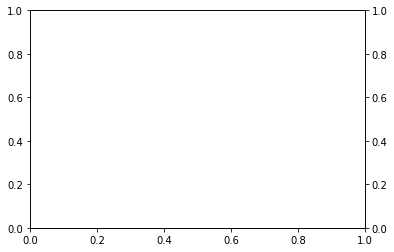

In [162]:
# comparing Graduation rate with Average Teacher Salary
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
y_pos = np.arange(len(education_final))
width = 0.4
education_final['Average Teacher Salary'].plot(kind='bar', color='red', ax=ax, width=width, position=1,
                                         title ="Average Graduation Rates and Average Teacher Salary per State",
                                         figsize=(20,15), fontsize=12)
education_final['Average Graduation Rate'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, figsize=(20,15),
                                         fontsize=12)
plt.xticks(y_pos, education_final['ST'])
ax.set_ylabel('Average Teacher Salary')
ax2.set_ylabel('Average Graduation Rate')
plt.legend(loc='best')

plt.savefig('GradRates_vs_Salary.png')
plt.show()

### Graduation Rate vs. Average SAT Score ###

In [ ]:
# comparing Graduation rate with Average SAT Score
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
y_pos = np.arange(len(education_final))
width = 0.4
education_final['Average New SAT Score'].plot(kind='bar', color='green', ax=ax, width=width, position=1,
                                         title ="Average Graduation Rates and Average New SAT Score per State",
                                         figsize=(20,15), fontsize=12)
education_final['Average Graduation Rate'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, figsize=(20,15),
                                         fontsize=12)
plt.xticks(y_pos, education_final['ST'])
ax.set_ylabel('Average New SAT Score')
ax2.set_ylabel('Average Graduation Rate')
plt.legend(loc='best')

plt.savefig('GradRates_vs_SAT.png')
plt.show()

### Graduation Rate vs. Pregnancy Rate ###

In [ ]:
# comparing Graduation rate with Pregnancy Rate
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
y_pos = np.arange(len(education_final))
width = 0.4
education_final['Pregnancy Rate (%)'].plot(kind='bar', color='orange', ax=ax, width=width, position=1,
                                         title ="Average Graduation Rates and Average Pregnancy Rates per State",
                                         figsize=(20,15), fontsize=12)
education_final['Average Graduation Rate'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, figsize=(20,15),
                                         fontsize=12)
plt.xticks(y_pos, education_final['ST'])
ax.set_ylabel('Pregnancy Rate (%)')
ax2.set_ylabel('Average Graduation Rate')
plt.legend(loc='best')

plt.savefig('GradRates_vs_PregRate.png')
plt.show()

### Gradution Rates vs. Spending per Student ###

NameError: name 'education_final' is not defined

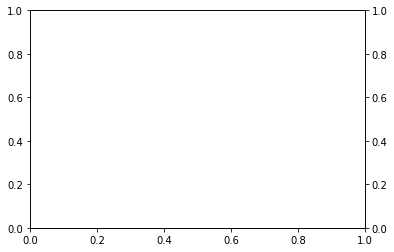

In [112]:
# comparing Graduation Rates with Spending per Student
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
y_pos = np.arange(len(education_final))
width = 0.4
education_final['Spending per Student'].plot(kind='bar', color='gold', ax=ax, width=width, position=1,
                                         title ="Average Graduation Rates and Spending per Student by State",
                                         figsize=(20,15), fontsize=12)
education_final['Average Graduation Rate'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, figsize=(20,15),
                                         fontsize=12)
plt.xticks(y_pos, education_final['ST'])
ax.set_ylabel('Spending per Student')
ax2.set_ylabel('Average Graduation Rate')
plt.legend(loc='best')

plt.savefig('GradRates_vs_StuSpend.png')
plt.show()